**Swechhya Maharjan**
2330487

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [47]:
# Defining the input matrix as above using np.array function.
I = np.array([[1, 1, 1, 0, 0], [0, 1, 1, 1 ,0], [0, 0, 1, 1, 1,], [0, 0, 1, 1, 0], [0, 1, 1, 0, 0]])

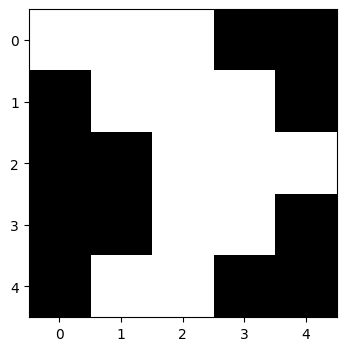

In [48]:
# Visualizing the input.
plt.imshow(I)

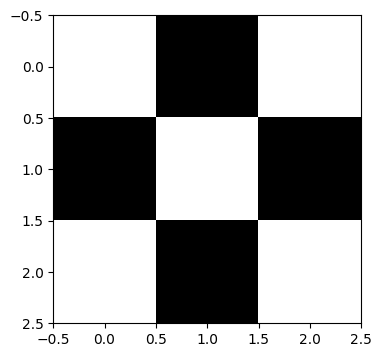

In [49]:
# Defining the input matrix as above using np.matrix function.
K = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
# Visualizing the Filter.
plt.imshow(K)


In [50]:
import numpy as np

def convolution(img, filter):
    """
    Function performs convolution operations.

    Arguments:
    img (ndarray): numpy array of an input image.
    filter (ndarray): numpy array of an input filter.

    Returns:
    filter_map (ndarray): Resulting feature map after convolution.
    """

    # Get the dimensions of the input image and filter
    img_height, img_width = img.shape
    filter_height, filter_width = filter.shape

    # Compute the output dimensions using the valid convolution formula
    output_height = img_height - filter_height + 1
    output_width = img_width - filter_width + 1

    # Initialize the output feature map
    filter_map = np.zeros((output_height, output_width))

    # Perform convolution operation
    for i in range(output_height):
        for j in range(output_width):
            # Extract the region of interest
            region = img[i:i+filter_height, j:j+filter_width]
            # Element-wise multiplication and sum
            filter_map[i, j] = np.sum(region * filter)

    return filter_map


In [51]:
img = convolution(I, K)

In [52]:
assert img.shape == (3, 3), " Convolution Operation did not produce correct output"

Test Passed


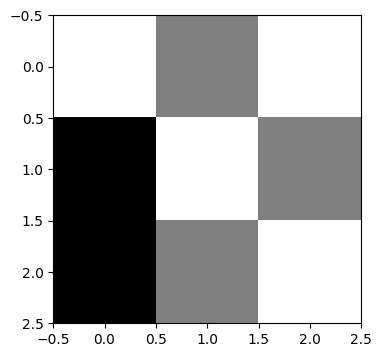

In [53]:
plt.imshow(img)
print("Test Passed")

# Section-2: In this section we will build very basic CNN architecture, Compile and train our CNN model.

This will be further divided into following sections:


## Section-2.1: Data Pre-processing.

Expected structure of folder:

-/Datasets/

      --train/
        -- acai/....     
        -- cupuacu/---
        -- all the classes--

In [54]:
data_dir = "/content/drive/MyDrive/FruitAmazon"

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [56]:
# Hyper-parameters:
batch_size = 32
img_height = 180
img_width = 180

### Load the Data:

We will use tf.keras.utility to load the image, for this function to work, your data should be in the structure suggested above.

We will do this for both training and validation dataset.

In [57]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [58]:
# Printing out number of Classes
import os
dataset_path = "/content/drive/MyDrive/FruitinAmazon"
print(os.listdir(dataset_path))

['test', 'train']


### Exercise:

1. To train a deep learning model we need to create a data pipeline, Multiple different approaches are available within keras framework;
one such framework is
  "tf.keras.utils.image_dataset_from_directory("parameter")

Implement above framework and explain the parameters you have used in the comment.

In [59]:
pip install keras tensorflow

In [60]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


In [61]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/FruitinAmazon",  # Replace with your dataset directory
    image_size=(224, 224),   # Resize images to a fixed size
    batch_size=32,           # Number of images per batch
    shuffle=True,            # Shuffle dataset for better training
    seed=42,                 # Set a seed for reproducibility
    validation_split=0.2,    # Split 20% for validation
    subset="training"        # Indicate that this is the training dataset
)


Found 120 files belonging to 2 classes.
Using 96 files for training.


In [62]:
import tensorflow as tf

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/FruitinAmazon",  # Path to extracted dataset
    image_size=(224, 224),     # Resize images to a fixed size
    batch_size=32,             # Number of images per batch
    shuffle=True,              # Shuffle dataset
    seed=42,                   # Ensure reproducibility
    validation_split=0.2,      # Use 20% of data for validation
    subset="validation"        # Load the validation subset
)


Found 120 files belonging to 2 classes.
Using 24 files for validation.


In [63]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['test', 'train']


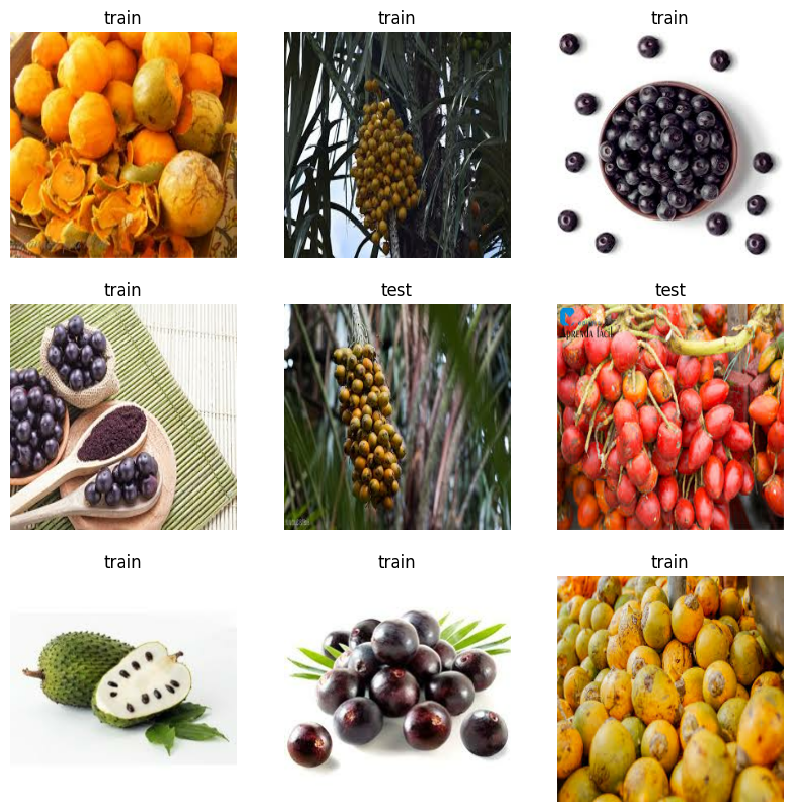

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [65]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [66]:
import tensorflow as tf
from tensorflow.keras import layers

def generate_model(img_height, img_width, nchannels, num_classes):
    """
    This function generates a CNN model with a defined set of hyperparameters.

    Input Args:
    image_height (int): Height of an image.
    image_width (int): Width of an image.
    nchannels (int): Number of channels in the image.
    num_classes (int): Number of classes in the dataset.

    Output Args:
    model (tf.keras.Model): A compiled CNN model.
    """

    model = tf.keras.Sequential([
        # Rescaling input values to [0,1] range
        layers.Rescaling(1./255, input_shape=(img_height, img_width, nchannels)),

        # First Block: Convolution + Pooling
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        # Second Block: Convolution + Pooling
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        # Third Block: Convolution + Pooling
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        # Flattening for Fully Connected Layers
        layers.Flatten(),

        # Fully Connected Layer
        layers.Dense(128, activation='relu'),

        # Output Layer (num_classes neurons for classification)
        layers.Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
    ])

    return model

In [67]:
num_classes = len(class_names)
model = generate_model(img_height, img_width, 3, num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,929,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,023,490 (30.61 MB)

 Trainable params: 8,023,490 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

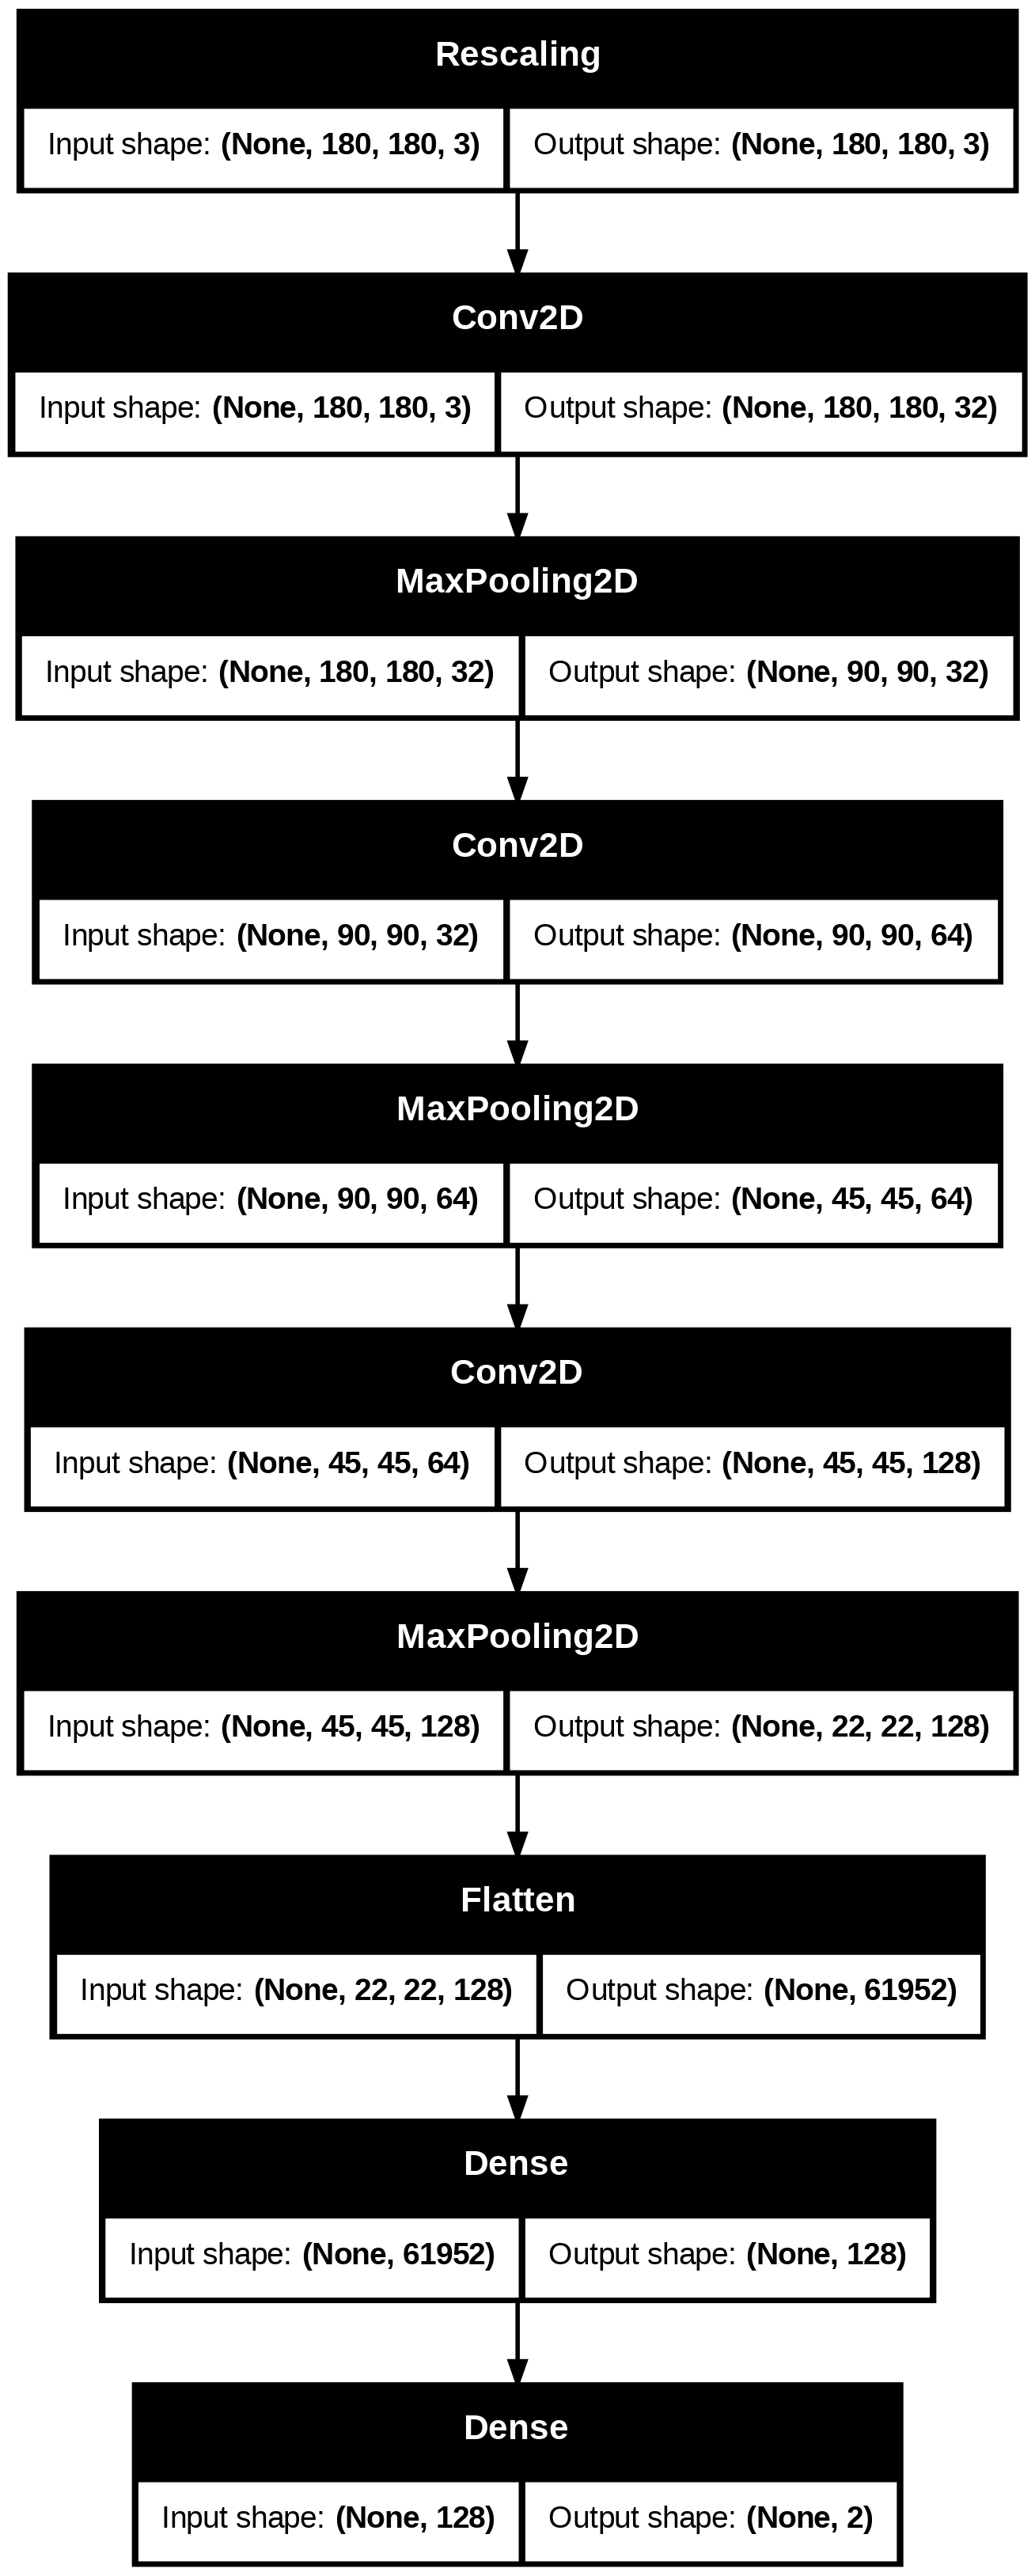

In [70]:
keras.utils.plot_model(model, show_shapes=True)

## Design CNN Architecture:



### Exercise:

Please fill the hyper-parameters as defined above in the below layers.

In [72]:
import tensorflow as tf
from tensorflow.keras import layers, models

def generate_model(image_height, image_width, nchannels, num_classes):
    model = models.Sequential([
        layers.Rescaling(1./255, input_shape=(image_height, image_width, nchannels)),

        # Convolutional Block 1
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        # Convolutional Block 2
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        # Convolutional Block 3
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        # Instead of Flatten, use GlobalAveragePooling2D
        layers.GlobalAveragePooling2D(),

        # Fully Connected Layers
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')  # Output Layer
    ])

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if labels are one-hot encoded
        metrics=['accuracy']
    )

    return model

# Initialize model
image_height, image_width, nchannels, num_classes = 224, 224, 3, 10  # Adjust num_classes based on dataset
model = generate_model(image_height, image_width, nchannels, num_classes)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


img_height = 180
img_width = 180

## Compile and Train Model.



In [71]:
model.compile(
    optimizer='adam',  # Adam optimizer (good default choice for CNNs)
    loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification with integer labels
    metrics=['accuracy']  # Track accuracy during training
)


### Train the Model.



In [74]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.7630 - loss: 0.5761 - val_accuracy: 0.7083 - val_loss: 0.5998
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.7630 - loss: 0.5659 - val_accuracy: 0.7083 - val_loss: 0.6181
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.7435 - loss: 0.5746 - val_accuracy: 0.7083 - val_loss: 0.6238
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.7591 - loss: 0.5710 - val_accuracy: 0.7083 - val_loss: 0.6042
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7318 - loss: 0.5952 - val_accuracy: 0.7083 - val_loss: 0.5992
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.7630 - loss: 0.5573 - val_accuracy: 0.7083 - val_loss: 0.6049
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.7474 - loss: 0.5758 - val_accuracy: 0.7083 - val_loss: 0.6144
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.7357 - loss: 0.5923 - val_accuracy: 0.7083 - val_loss:

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.3529 - loss: 2.2197 - val_accuracy: 0.7083 - val_loss: 1.8190 - learning_rate: 0.0010
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.7474 - loss: 1.6570 - val_accuracy: 0.7083 - val_loss: 1.1920 - learning_rate: 0.0010
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.7747 - loss: 1.0564 - val_accuracy: 0.7083 - val_loss: 1.2456 - learning_rate: 0.0010
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.7943 - loss: 0.8517 - val_accuracy: 0.7083 - val_loss: 0.8133 - learning_rate: 0.0010
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7474 - loss: 0.7117 - val_accuracy: 0.7083 - val_loss: 0.6795 - learning_rate: 0.0010
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.7669 - loss: 0.6953 - val_accuracy: 0.7083 - val_loss: 0.6584 - learning_rate: 0.0010
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7747 - loss: 0.6303 - val_accuracy: 0.

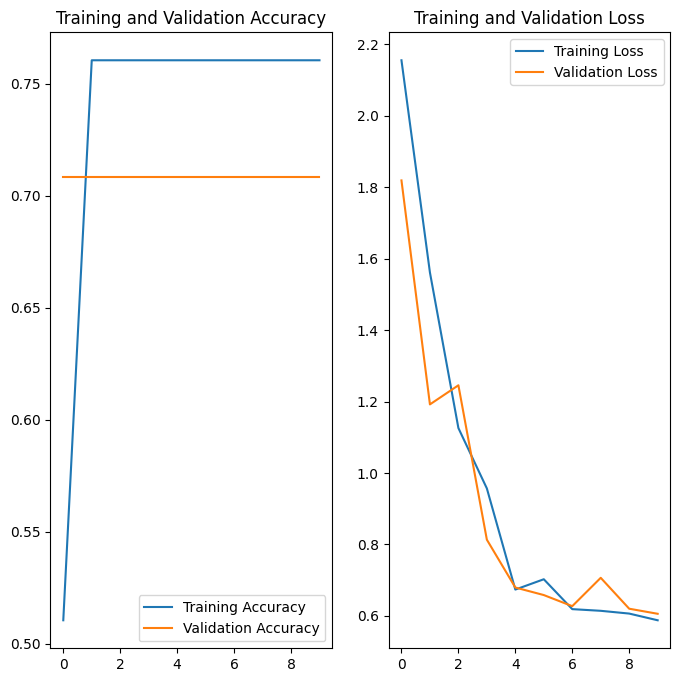

In [73]:
# Training the model (Ensure this part runs successfully first)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)
    ]
)

# Plotting the results after training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)  # Using 10 as the number of epochs

plt.figure(figsize=(8, 8))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()
